# Graded Project
Machine Learning - Unsupervised Learning

# Import the required libraries and load the data

### 1.Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score

### 2.Load the Data and Check the Shape and Info of the data

####  Load the CSV file and display the Samples of Record

In [2]:
df = pd.read_csv('renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
df.tail()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
192539,192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"
192543,192543,fit,123612,36b,127865,155lbs,10.0,wedding,This dress was wonderful! I had originally pla...,athletic,I wore this to a beautiful black tie optional ...,gown,"5' 6""",16,30.0,"August 29, 2017"


####  Checking the shape and info

In [4]:
df.shape

(192544, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [6]:
df.size

3080704

In [7]:
df.ndim

2

#### Inference
- The dataset has 192544 rows and 16 columns
- There is missing values in some columns, so we have to treat with appropriate method

# Data cleansing and Exploratory data analysis

### 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [8]:
df.duplicated().sum()

0

- There is no duplicated record in this dataset

### 4. Drop the columns which you think redundant for the analysis.

In [9]:
df.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

#### Inferences
- We dropped 6 redundant columns namely for this analysis: 'Unnamed:0', 'user_id', 'item_id', 'review_text', 'review_summary', 'review_date'
Currently there are 10 columns after dropped the redundant columns.

#### There are some redundant columns for the analysis

In [10]:
df=df.drop(columns=['Unnamed: 0','user_id','item_id','review_text','review_summary','review_date'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   174133 non-null  object 
 2   weight      162562 non-null  object 
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  object 
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 14.7+ MB


#### Inferences:
- We dropped 6 redundant columns namely for this analysis: 'Unnamed:0', 'user_id', 'item_id', 'review_text', 'review_summary', 'review_date'
- Currently there are 10 columns after dropped the redundant columns.

### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float.

In [12]:
df['weight'].dtype

dtype('O')

In [13]:
df['weight']=df['weight'].str.replace('lbs', '')

In [14]:
df['weight']=df['weight'].astype(float)

In [15]:
df['weight'].dtype

dtype('float64')

- If yes, remove the string data and converted to float.

In [16]:
df.head(2)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0


- There is a string data in the weight column, as per our requirement. The lbs unit present in the dataset is removed and converted into float datatype

### 6. Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'.

In [17]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [18]:
df['rented for']=df['rented for'].replace(['party: cocktail'],'party')

In [19]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. 

In [20]:
df['height'].dtype

dtype('O')

In [21]:
df.head(2)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0


In [22]:
df.height = [np.nan if 'nan' in x else ((float(str(x).split("'")[0]) * 12) + (float(str(x).split("'")[1].strip('"'))) )
                                          for x in df.height.astype(str)]

#df.height = df.height.fillna(df.height.median())

df.height = df.height.astype(float)

df.height


0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

- The height column is converted into float using above steps.

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods

In [23]:
df.isnull().sum()

fit               0
bust size     18411
weight        29982
rating           82
rented for       10
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

In [24]:
## Now filling "NAN" with the most frequent value- the mode.
for col in ['bust size', 'body type', 'rented for']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
##
for col in ['weight', 'height', 'age', 'rating']:
    df[col].fillna(df[col].median(), inplace=True)

In [25]:
df.isnull().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

- There is missing values in the categorical columns of 'fit','bust size', 'body type', 'rented for' and numerical columns of 'weight', 'height', 'age', 'rating'. That are filled with above appropriate method.

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [26]:
df.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,137.019284,9.092758,65.309529,12.245175,33.861689
std,20.141448,1.429862,2.658857,8.494877,8.039050
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,125.000000,8.000000,63.000000,8.000000,29.000000
50%,135.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


In [27]:
## Checking Statistical Summary for Object data type
df.describe(include='O')

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


- while analysing the weight, age column with min, max, mean there can clearly see that ouliers are present in that.

### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

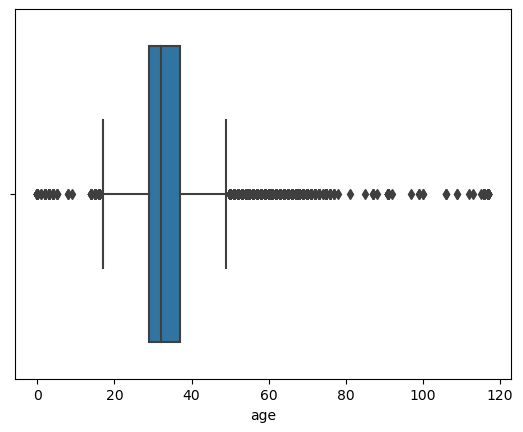

In [28]:
sns.boxplot(df['age'])
plt.show()

- Yes there is outlier in the column 'age', i try with Log Transformation method

In [29]:
Q1= df['age'].quantile(0.25)
Q3= df['age'].quantile(0.75)
IQR = Q3-Q1

lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3+(1.5*IQR)

In [30]:
df_out = df.loc[(df['age'] < upper_whisker) & (df['age'] > lower_whisker)]

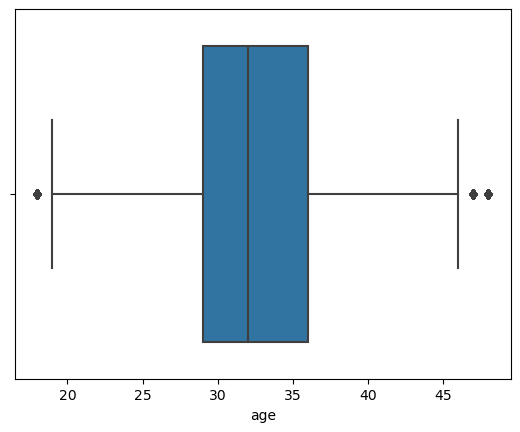

In [31]:
sns.boxplot(df_out['age'])
plt.show()

- After using IQR method, the outliers are minimised.

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. 

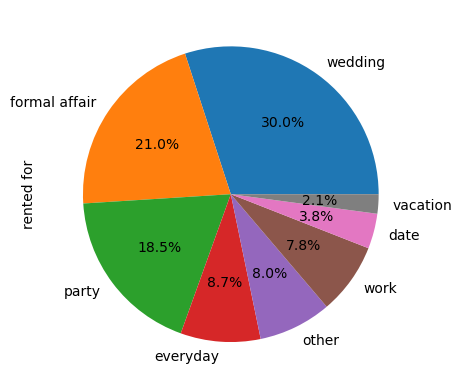

In [32]:
df['rented for'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

- Majorly the dress is rented for the wedding, party, formal affiar purposes.

## Data Preparation for model building

### 12. Encode the categorical variables in the dataset.

In [33]:
df_cat = df.select_dtypes(include='object')

## Label encoding
le = LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])
    
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,135.0,10.0,4,3,45,64.0,4,116.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0


### 13. Standardize the data, so that the values are within a particular range

In [34]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [35]:
scaled_features_df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556291,-0.004640,-0.000957,0.634498,0.514420,0.020953,1.569310,1.011893,0.206575,-0.729154
1,-0.556291,-0.187210,-0.249202,0.634498,-0.456753,1.927582,-0.307247,0.259688,-0.028862,0.265991
2,-0.556291,-0.187210,-0.100255,0.634498,0.028833,0.020953,1.647500,-0.492517,-0.970608,10.217442
3,-0.556291,-0.095925,-0.100255,-0.764242,-0.942340,0.656496,-0.620006,-0.116415,-0.499735,0.017205
4,-0.556291,-0.187210,0.396235,0.634498,1.000007,-1.250132,-0.307247,1.387995,-0.028862,-0.853547


# Principal Component Analysis and Clustering

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [36]:
## Calculating covariance matrix
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00000519e+00  9.05525666e-03  1.36712983e-02 -2.45044635e-01
   8.35378787e-03 -7.61016810e-03  3.35892077e-04  1.44717645e-04
   6.54006939e-02  1.59721574e-03]
 [ 9.05525666e-03  1.00000519e+00  5.68663389e-01 -2.09457651e-02
  -2.07814670e-03 -2.15702411e-01 -1.09647683e-02  1.47036167e-01
   6.27115858e-01  1.65476458e-01]
 [ 1.36712983e-02  5.68663389e-01  1.00000519e+00 -2.08485232e-02
   9.70156108e-03 -2.34400313e-01 -1.44172746e-02  3.49055850e-01
   7.23391050e-01  6.29822084e-02]
 [-2.45044635e-01 -2.09457651e-02 -2.08485232e-02  1.00000519e+00
   1.27900970e-02  4.72965534e-03 -2.37071846e-02  1.74835660e-03
  -3.67286881e-02 -3.51310734e-02]
 [ 8.35378787e-03 -2.07814670e-03  9.70156108e-03  1.27900970e-02
   1.00000519e+00 -9.08626233e-03 -5.76351186e-02 -1.70706029e-02
   4.87422452e-03 -3.82507449e-02]
 [-7.61016810e-03 -2.15702411e-01 -2.34400313e-01  4.72965534e-03
  -9.08626233e-03  1.00000519e+00 -1.85295641e-03 -1.33577071e-01
  -2.14155816

In [37]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 3.79182406e-02  5.21339725e-02 -3.73184198e-02  6.88434588e-01
   6.93932057e-01 -1.76424493e-01  5.38601361e-02  6.33233638e-02
  -3.03727146e-02  2.97369220e-03]
 [ 4.96913898e-01  1.06638737e-01 -7.89323759e-01 -1.84310214e-02
  -4.70940698e-02  7.62941588e-02 -1.83968543e-01  2.48180115e-01
   1.56953838e-02 -1.20872949e-01]
 [ 5.43366077e-01  6.70187842e-01  4.54017747e-01 -5.09818200e-02
  -3.46047997e-02 -7.31970933e-02  8.00361572e-02  5.47991186e-02
  -1.11402528e-02 -1.75448454e-01]
 [-3.64031019e-02  7.04524838e-03 -6.01937589e-04 -7.00031122e-01
   7.03930568e-01  4.58063321e-02 -4.05279947e-02  8.70339882e-02
   2.32987301e-02 -3.47061487e-02]
 [-1.94047852e-04 -2.65517065e-03 -1.48403766e-02 -4.65662187e-02
  -2.69087466e-02 -5.95847893e-01 -3.74763049e-01 -2.22693417e-01
   6.69042233e-01 -6.47167696e-02]
 [-2.54214421e-01  1.92370737e-02 -2.76410781e-02  4.84620878e-02
   6.13850242e-04  6.32829507e-02 -1.41897827e-01 -1.49609530e-01
  -1.59830054e-0

In [38]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp, '\n')
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [25.493744303499692, 12.489368205336868, 10.847832273773115, 10.180678986925304, 9.4534788747705, 8.886778360335535, 8.399795477769073, 7.521027307046054, 4.169523708096748, 2.557772502447119] 

Cummulative Variance Explained:  [ 25.4937443   37.98311251  48.83094478  59.01162377  68.46510264
  77.351881    85.75167648  93.27270379  97.4422275  100.        ]


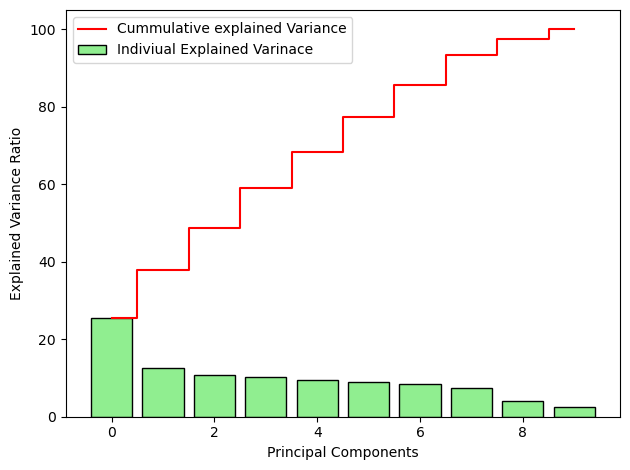

In [39]:
## Scree plot
plt.bar(range(10),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(10), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

- We can see that approximately 93% of variance is explained by the first 8 variables.
- so, we can choose the optimal number of principal components as 8.

In [40]:
## Fitting the PCA model
pca=PCA(n_components = 8)
pca.fit(scaled_features_df)

PCA(n_components=8)

In [41]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.222657,-0.871255,0.133583,-1.317746,1.385041,0.498137,0.391549,-0.094749
1,-0.669093,-0.723509,0.446753,0.289349,-0.841026,1.623649,0.570854,-0.121513
2,0.516748,0.397317,6.325453,5.708219,1.007211,-1.845138,5.258172,-1.277636
3,-0.559129,0.180109,0.347079,0.003970,-1.167688,0.306926,0.030717,0.933800
4,0.642889,-1.200274,-1.443786,-0.923737,0.522263,-0.878866,0.616614,0.009609


### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

#### a. Find the optimal K Value using elbow plot for K Means clustering

In [42]:
cluster_range = range(2,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,2,1.496415e+06
1,3,1.358288e+06
2,4,1.248766e+06
3,5,1.154887e+06
4,6,1.092696e+06
5,7,1.038090e+06
6,8,9.867346e+05
7,9,9.527621e+05
8,10,9.239364e+05
9,11,8.977387e+05


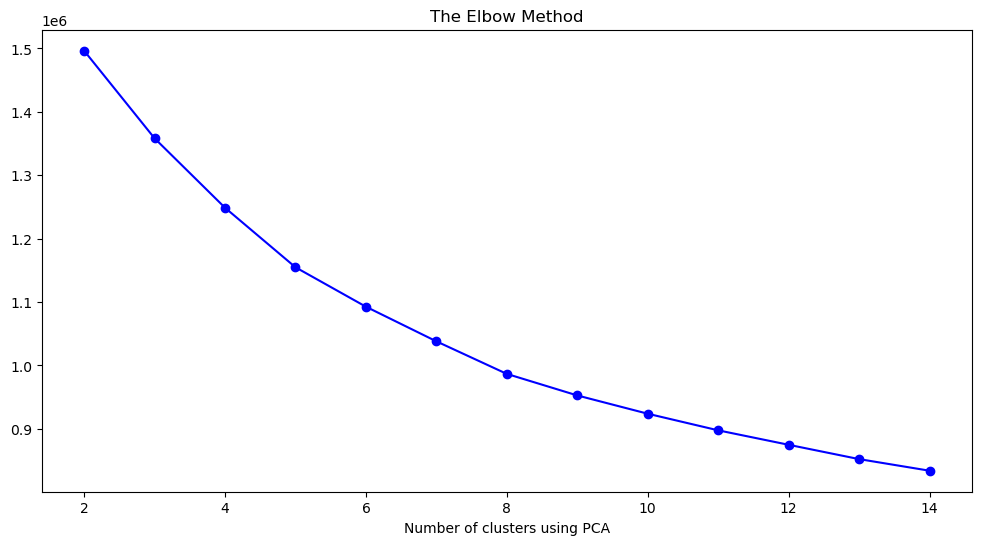

In [43]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the Elbow plot, we can see that at K=2 the interia starts to drop significantly. So we will do it using 3 clusters.

In [44]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=3, random_state=100)

#### b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

In [45]:
## obtained labels from kmeans clustering
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 1])

In [46]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,0
1,0
2,1
3,0
4,1


In [47]:
## Joining the label dataframe to the data_pca dataframe
kmeans_df = data_pca.join(df_labels)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,0.222657,-0.871255,0.133583,-1.317746,1.385041,0.498137,0.391549,-0.094749,0
1,-0.669093,-0.723509,0.446753,0.289349,-0.841026,1.623649,0.570854,-0.121513,0
2,0.516748,0.397317,6.325453,5.708219,1.007211,-1.845138,5.258172,-1.277636,1
3,-0.559129,0.180109,0.347079,0.003970,-1.167688,0.306926,0.030717,0.933800,0
4,0.642889,-1.200274,-1.443786,-0.923737,0.522263,-0.878866,0.616614,0.009609,1


In [48]:
kmeans_df['Labels'].value_counts()

0    100525
1     58016
2     34003
Name: Labels, dtype: int64

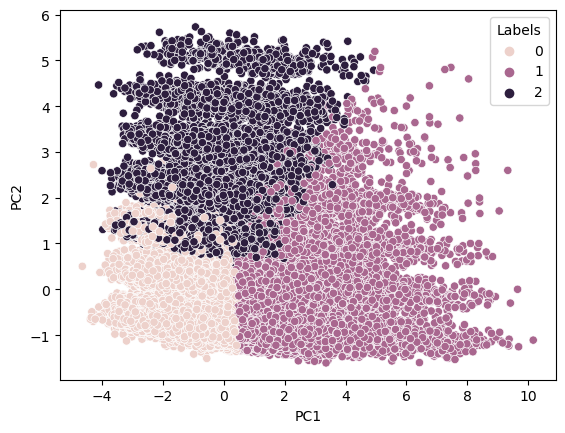

In [49]:
## Visualizing the clusters formed
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Labels',data=kmeans_df)
plt.show()

#### c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [50]:
kmeans_score = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans = kmeans.fit(data_pca)
    labels = kmeans.predict(data_pca)
    print(i,silhouette_score(data_pca, labels))

2 0.16217386530234373
3 0.16312117846871463
4 0.15884547952574135
5 0.13520690621587397
6 0.13696982511439634
7 0.14246859290666297
8 0.13056828681220456
9 0.11846608904444753


- From above, we can observe that for 8 clusters the silhoutte score is highest, we can choose optimal clusters as 3.

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data)

#### a. Find the optimal K Value using dendrogram for Agglomerative clustering.

In [51]:
##- Sampling a dataset for Agglomerative clustering using PCA transformed data
sample_data_pca_agglo = data_pca.head(50000)
sample_data_pca_agglo.shape

(50000, 8)

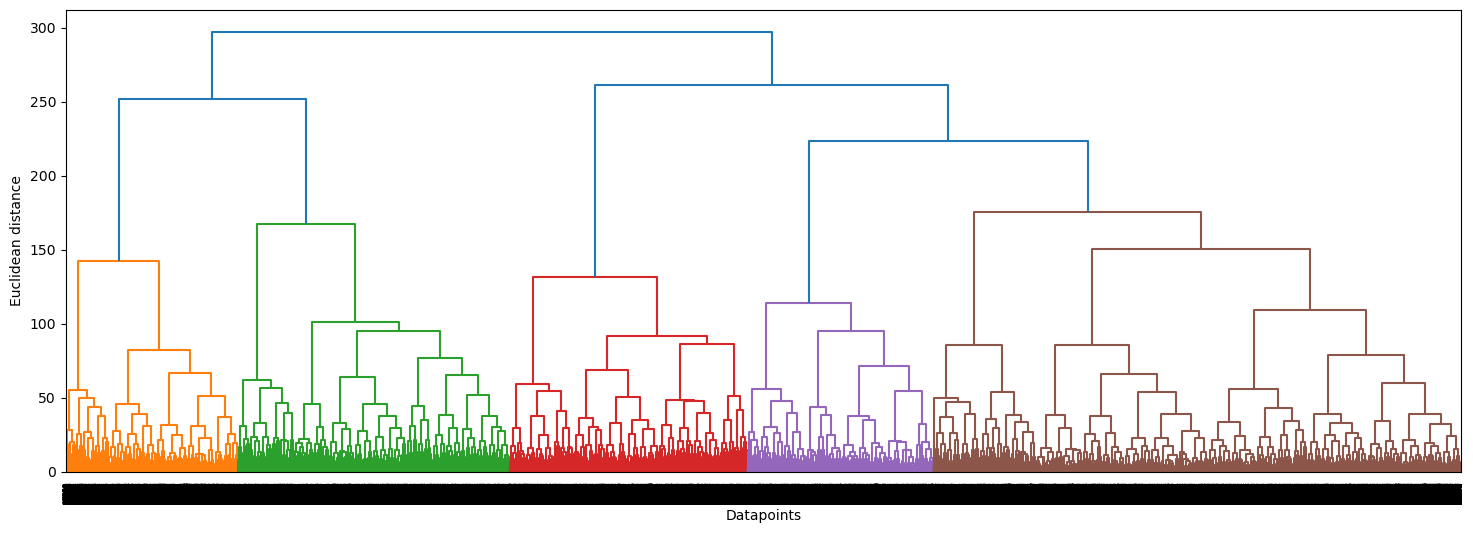

In [52]:
plt.figure(figsize=[18,6])
merg = linkage(sample_data_pca_agglo, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [53]:
## Building hierarchical clustering model using the optimal clusters as 3
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(sample_data_pca_agglo)

In [54]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,2
1,1
2,1
3,1
4,1


In [55]:
## Joining the label dataframe to the data_pca dataframe
df_hier = sample_data_pca_agglo.join(df_label1)
df_hier.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,0.222657,-0.871255,0.133583,-1.317746,1.385041,0.498137,0.391549,-0.094749,2
1,-0.669093,-0.723509,0.446753,0.289349,-0.841026,1.623649,0.570854,-0.121513,1
2,0.516748,0.397317,6.325453,5.708219,1.007211,-1.845138,5.258172,-1.277636,1
3,-0.559129,0.180109,0.347079,0.003970,-1.167688,0.306926,0.030717,0.933800,1
4,0.642889,-1.200274,-1.443786,-0.923737,0.522263,-0.878866,0.616614,0.009609,1


In [56]:
for i in range(2,10):
    hier = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    hier = hier.fit(sample_data_pca_agglo)
    labels = hier.fit_predict(sample_data_pca_agglo)
    print(i,silhouette_score(sample_data_pca_agglo,labels))

2 0.1215820714574751
3 0.11174415735206854
4 0.11678934920868941
5 0.09395592493923934
6 0.08796099922058562
7 0.09778937370977198
8 0.06631611356350972
9 0.0651317860044264


- From above, we can observe that for 8 clusters the silhoutte score is highest, we can choose optimal clusters as 2.

# Conclusion

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

- Based on the segmentation of clustering techniques i.e Kmeans and Agglomerative clustering and we also reduced the dimensionality of the dataset using PCA.
- we observed that the highest silhouette score for the optimized cluster is K = 3 using Kmeans clustering technique, so we take the 3 clusters for segmentation of data.

In [57]:
## Joining the label dataframe to the data_pca dataframe
kmeans_df1 = df.join(df_labels)
kmeans_df1.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0,0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0,0
2,0,37,135.0,10.0,4,3,45,64.0,4,116.0,1
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0,0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0,1


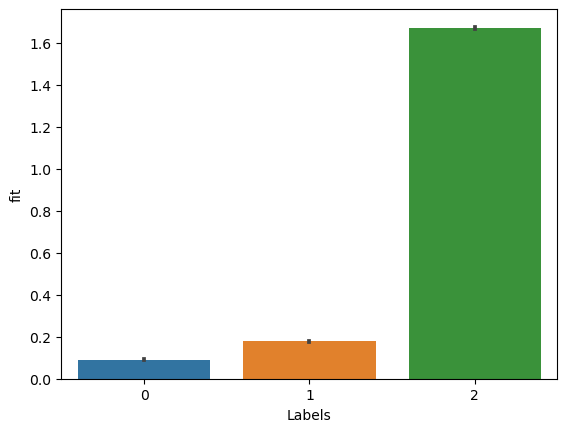

In [58]:
## Performing Clustering Analysis

sns.barplot(kmeans_df1['Labels'], kmeans_df1['fit'])
plt.show()

- The maximum fitting are used by the Cluster 2 than the cluster 1 & 0

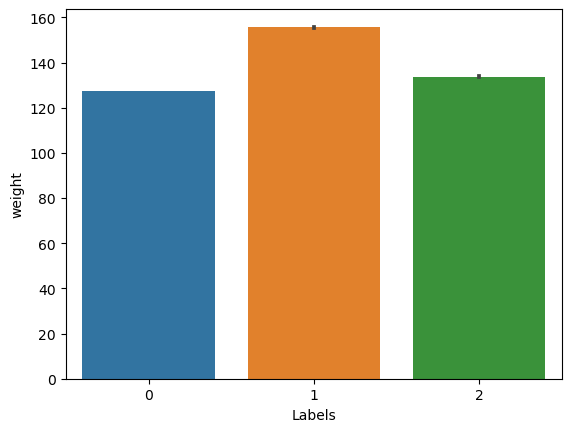

In [59]:
sns.barplot(kmeans_df1['Labels'], kmeans_df1['weight'])
plt.show()

- the customer weights are higher in cluster 1 than the cluster 0 & 2

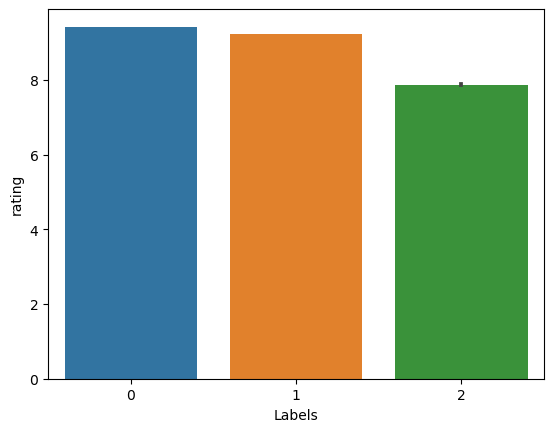

In [60]:
sns.barplot(kmeans_df1['Labels'], kmeans_df1['rating'])
plt.show()

- The Higher Ratings are given by the customers of cluster 0 than the cluster 1& 2.

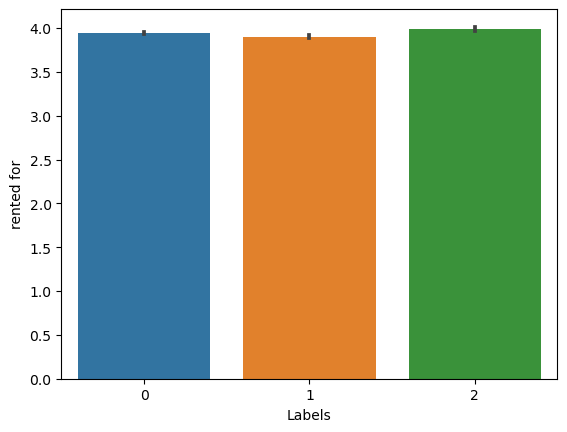

In [61]:
sns.barplot(kmeans_df1['Labels'], kmeans_df1['rented for'])
plt.show()

- Mostly all cluster customers are rented equally for the occasions

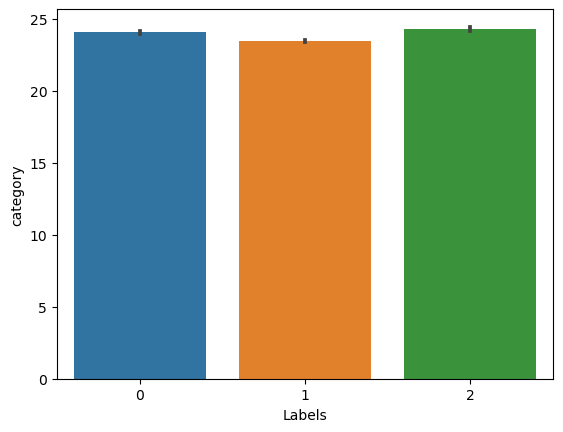

In [62]:
sns.barplot(kmeans_df1['Labels'], kmeans_df1['category'])
plt.show()

- Almost all type of dresses rented by the all three clusters.

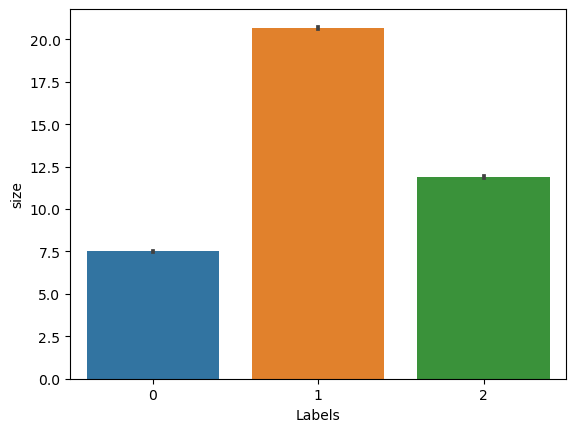

In [63]:
sns.barplot(kmeans_df1['Labels'], kmeans_df1['size'])
plt.show()

- The cluster 1 has the Higher age group customers followed by cluster 2 and 0

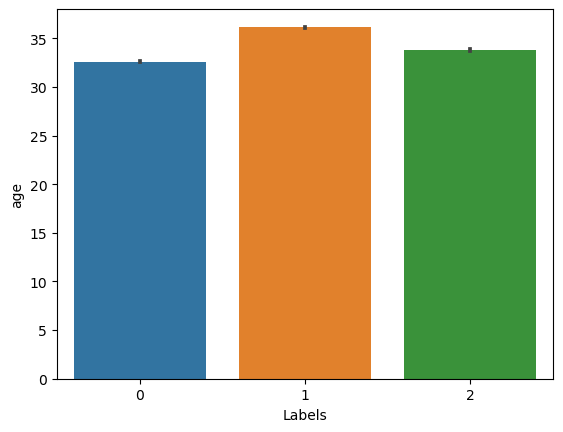

In [64]:
sns.barplot(kmeans_df1['Labels'], kmeans_df1['age'])
plt.show()

- The cluster 1 has the Higher age group customers followed by cluster 2 and 0

# Conclusion

- In this case study, we try to segment the e-commerce dataset using K-means and agglomerating clustering techniques.
- The customers belongs to cluster 1 are the Most important groups, they are higher age group peoples and their weight is high when compare to other clusters, they were choosing the higher size of dressed of particular fit type of differnt categories. They giving the higher rating as feedback.
- The cluster 0 and 1 are the giving Good ratings and the cluster 2 customers took the minimal/ particular type of fit of different categories.
- Customers from cluster 2 are found with maximum fitting than cluster 0 & 1.
- Heighly, Rented-for category and Rating of customers in Cluster 0,1,2 are almost the same/ equal
- Highly weighing customers are found in Cluster 1 whereas Cluster 0 & 2 has low weight customers
- Cluster 1 has most people with higher age category than the cluster 0 & 2
- Cluster 1 has customers who demand for most varied sizes than the cluster 0 & 2. 